<a href="https://colab.research.google.com/github/raihanewubd/MLSummer24/blob/main/LSTM_Example_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Courses/2024Summer/ML/Dataset/NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


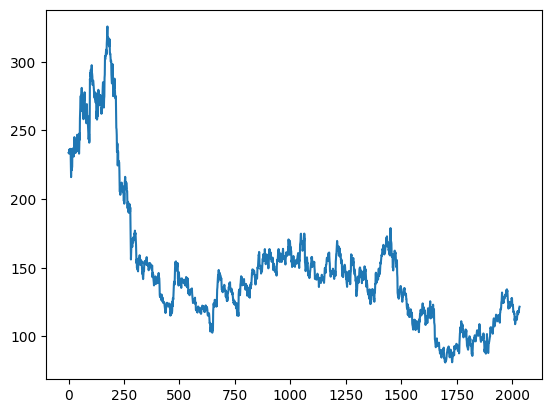

In [5]:
df2 = df.reset_index()['Close']
plt.plot(df2)

**Data Preprocessing**

In [6]:
scaler = MinMaxScaler()
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))
df2.shape

(2035, 1)

**Train-Test Split**

In [7]:
train_size = int(len(df2)*0.65)
test_size = len(df2) - train_size
train_data,test_data = df2[0:train_size,:],df2[train_size:len(df2),:1]

In [31]:
print(f"train_data.shape: {train_data.shape}")
print(f"test_data.shape: {test_data.shape}")


train_data.shape: (1322, 1)
test_data.shape: (713, 1)


**Creating dataset with time step 100**

[10, 20, 30, 40, 50, 60, 70, 80, 90]


---


X,				y
10, 20, 30		40
20, 30, 40		50
30, 40, 50		60
...


[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90

In [38]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
a = train_data[0:(0+time_step),0]
print(a)
print(a.shape)

In [ ]:
y = train_data[0 + time_step,0]
print(f"y.shape: {y.shape}")
print(f"y: {y}")
print(f"y.dtype: {y.dtype}")

In [ ]:
# calling the create dataset function to split the data into
# input output datasets with time step 100
time_step = 100
X_train,Y_train =  create_dataset(train_data,time_step)
X_test,Y_test =  create_dataset(test_data,time_step)

In [29]:
# checking values
print(f"X_train.shape: {X_train.shape}")
print(f"Y_train.shape: {Y_train.shape}")

print(f"X_test.shape: {X_test.shape}")
print(f"Y_test.shape: {Y_test.shape}")

X_train.shape: (1221, 100)
Y_train.shape: (1221,)
X_test.shape: (612, 100)
Y_test.shape: (612,)


In [ ]:
plt.plot(X_train)

**Creating and fitting LSTM model**

In [13]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (X_train.shape[1],1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

This code defines a sequential Keras model for possibly a time series or sequence prediction task.

1. `model = Sequential():`
     This line initializes a sequential model, which is linear stack of layers where you can add layers one after another.

2. `model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))`:
     This adds the first LSTM (Long Short-Term Memory) layer to the model.
     
     **50:** This specifies that the layer will have 50 internal units or memory cells.
     
     **return_sequences=True:** This indicates that the layer should return the full sequence of outputs (not just the last output), which is necessary when stacking multiple LSTM layers.
     
     **input_shape=(X_train.shape[1], 1):** This defines the shape of the input data expected by the layer. X_train.shape[1] represents the number of time steps in your input sequences, and 1 indicates that you have a single feature at each time step.
     **model.add(LSTM(50, return_sequences=True)):** This adds a second LSTM layer with 50 units. Since return_sequences=True, it will also return the full sequence of outputs.

3. **model.add(LSTM(50)):** This adds a third LSTM layer with 50 units. This
   time, return_sequences is not specified (defaults to False), so it will only return the last output in the sequence.

4. **model.add(Dense(1)):** This adds a dense layer (fully connected layer) with a single output unit. This is typically used for the final prediction in a regression task.

5. **model.compile(loss='mean_squared_error', optimizer='adam')**: This compiles the model, specifying the loss function and optimizer to use during training.

    **loss='mean_squared_error':** This is a common loss function for regression problems, measuring the average squared difference between predicted and actual values.
    
    **optimizer='adam':** This is a popular optimization algorithm that adapts the learning rate during training.
6. **model.summary():** This prints a summary of the model architecture, showing the layers, output shapes, and number of parameters.

In [14]:
model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 100,batch_size = 64,verbose = 1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 279ms/step - loss: 0.0512 - val_loss: 0.0093
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - loss: 0.0050 - val_loss: 0.0013
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - loss: 0.0026 - val_loss: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 281ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - loss: 0.0016 - val_loss: 9.8116e-04
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━

**Prediction and checking performance matrix**

In [16]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [17]:
# transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [18]:
print(f"RMSE for Training: {math.sqrt(mean_squared_error(Y_train,train_predict))}")
print(f"RMSE for Testing: {math.sqrt(mean_squared_error(Y_test,test_predict))}")

RMSE for Training: 165.0083517031695
RMSE for Testing: 114.96510150381522


**Graph Plotting**

Lookback variable takes the number of values behind the current value i.e.; remembering the previous 100 values which is as same as LSTM. Here every time while plotting the graph, the trainPredictionPlot will take 100 values behind them and plot it. and the plotting goes from previous 100th value and goes till the length of the trainpredict + the lookback i.e.; 100.

In [19]:
look_back = 100

In [20]:
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back : len(train_predict)+look_back,:] = train_predict

In [21]:
testPredictPlot = np.empty_like(df2)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back)*2 + 1 : len(df2) - 1,:] = test_predict

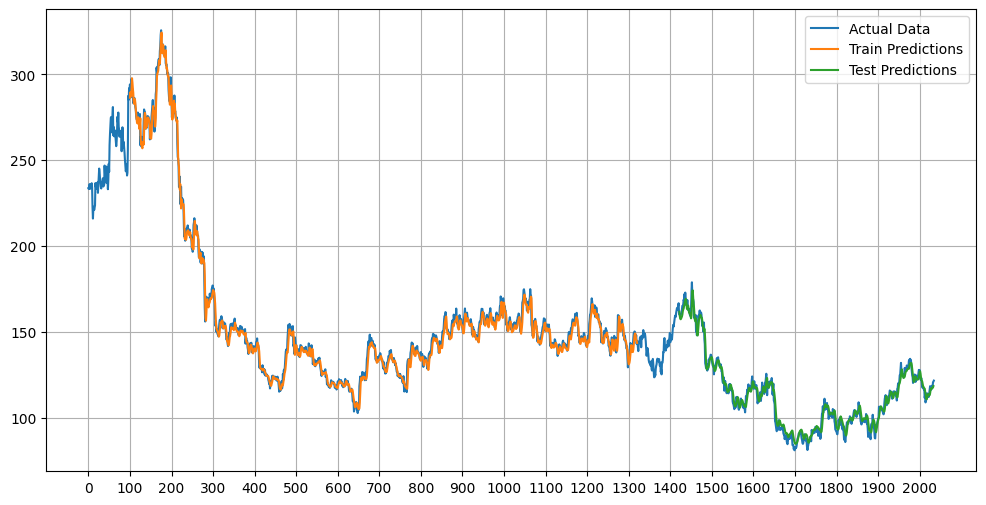

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df2), label='Actual Data') # Added label for actual data
plt.plot(trainPredictPlot, label='Train Predictions') # Added label for training predictions
plt.plot(testPredictPlot, label='Test Predictions') # Added label for test predictions
x_data = np.arange(len(scaler.inverse_transform(df2)))

plt.xticks(x_data[::100])  # Set x-ticks with a gap of 100
plt.legend() # Show the legend
plt.grid(True)
plt.show()